Notes to try: Feature importance; conversion of data to 0 and 1; logistic regression threshold

In [644]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import make_scorer
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
dfraw = pd.read_csv('/Users/robholmstrom/Downloads/patient.csv')

In [3]:
dfraw.shape

(95839, 20)

In [4]:
pd.set_option("display.max_rows", 101)

In [5]:
dfraw.head(3)

,sex,patient_type,intubated,pneumonia,age,pregnant,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,another_case,outcome,icu,death_date
0,2,1,97,2,42,97,2,2,1,2,2,2,2,2,2,2,99,1,97,9999-99-99
1,1,1,97,2,51,2,2,2,2,2,2,2,2,2,2,2,99,1,97,9999-99-99
2,2,2,2,2,51,97,1,2,2,2,1,2,2,1,2,2,99,1,2,9999-99-99


In [6]:
for x in dfraw:
    print(dfraw[x].value_counts())

2    48720
1    47119
Name: sex, dtype: int64
1    70268
2    25571
Name: patient_type, dtype: int64
97    70268
2     23613
1      1934
99       24
Name: intubated, dtype: int64
2     78203
1     17628
99        8
Name: pneumonia, dtype: int64
30     2390
31     2390
35     2370
29     2367
34     2366
       ... 
100      11
99        9
101       4
102       4
113       1
Name: age, Length: 104, dtype: int64
97    48720
2     45909
1       978
98      232
Name: pregnant, dtype: int64
2     82544
1     12878
98      417
Name: diabetes, dtype: int64
2     92973
1      2462
98      404
Name: copd, dtype: int64
2     91102
1      4328
98      409
Name: asthma, dtype: int64
2     93099
1      2314
98      426
Name: immunosuppression, dtype: int64
2     78721
1     16716
98      402
Name: hypertension, dtype: int64
2     90639
1      4642
98      558
Name: other_diseases, dtype: int64
2     92437
1      2986
98      416
Name: cardiovascular, dtype: int64
2     79852
1     15597
98      390

In [7]:
# Checking unique values in each columns. 
# For all except outcome, 1 = No; 2 = Yes; 97 = Not applicable; 99 = Null. Unclear what 98 stands for
# For outcome, 1, 2, and 3 are different testing companies
for x in dfraw:
    print(x, np.unique(dfraw[x]))

sex [1 2]
patient_type [1 2]
intubated [ 1  2 97 99]
pneumonia [ 1  2 99]
age [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 113]
pregnant [ 1  2 97 98]
diabetes [ 1  2 98]
copd [ 1  2 98]
asthma [ 1  2 98]
immunosuppression [ 1  2 98]
hypertension [ 1  2 98]
other_diseases [ 1  2 98]
cardiovascular [ 1  2 98]
obesity [ 1  2 98]
chronic_kidney_failure [ 1  2 98]
smoker [ 1  2 98]
another_case [ 1  2 99]
outcome [1 2 3]
icu [ 1  2 97 99]
death_date ['2020-01-15' '2020-01-29' '2020-02-10' '2020-02-23' '2020-03-04'
 '2020-03-09' '2020-03-16' '2020-03-17' '2020-03-18' '2020-03-19'
 '2020-03-20' '2020-03-22' '2020-03-23' '2020

In [184]:
dfraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95839 entries, 0 to 95838
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sex                     95839 non-null  int64 
 1   patient_type            95839 non-null  int64 
 2   intubated               95839 non-null  int64 
 3   pneumonia               95839 non-null  int64 
 4   age                     95839 non-null  int64 
 5   pregnant                95839 non-null  int64 
 6   diabetes                95839 non-null  int64 
 7   copd                    95839 non-null  int64 
 8   asthma                  95839 non-null  int64 
 9   immunosuppression       95839 non-null  int64 
 10  hypertension            95839 non-null  int64 
 11  other_diseases          95839 non-null  int64 
 12  cardiovascular          95839 non-null  int64 
 13  obesity                 95839 non-null  int64 
 14  chronic_kidney_failure  95839 non-null  int64 
 15  sm

In [185]:
dfraw.columns

Index(['sex', 'patient_type', 'intubated', 'pneumonia', 'age', 'pregnant',
       'diabetes', 'copd', 'asthma', 'immunosuppression', 'hypertension',
       'other_diseases', 'cardiovascular', 'obesity', 'chronic_kidney_failure',
       'smoker', 'another_case', 'outcome', 'icu', 'death_date'],
      dtype='object')

# Data cleaning

In [219]:

# Select out continous variable in seperate list
unaltercols = ['age','outcome']
# Select all columns that  will be treated the same way
altercols = ['sex', 'patient_type', 'intubated', 'pneumonia',
       'diabetes', 'copd', 'asthma', 'immunosuppression', 'hypertension',
       'other_diseases', 'cardiovascular', 'obesity', 'chronic_kidney_failure',
       'smoker']

# Eliminate unclears (98 values), clear nulls (99)  and convert non-applicable (97) to 'no' for all columns
# except pregnant or icu columns.
# This will allow more choice downstream.
dfreplace = pd.concat([dfraw[unaltercols], dfraw[altercols].replace({99:np.nan, 97:2, 98:np.nan, 3:np.nan})], axis = 1)

# Further eliminate nulls from pregnant column
dfreplace1 = pd.concat([dfreplace,dfraw['pregnant'].replace(98,np.nan)], axis = 1)                    

# Further eliminate nulls from icu column
dfreplace2 = pd.concat([dfreplace1, dfraw['icu'].replace(99, np.nan)],axis=1)
dfreplace2 = dfreplace2.loc[dfreplace2['patient_type'] == 2,:]
dfreplace2 = pd.get_dummies(dfreplace2, columns = ['outcome']).drop('patient_type', axis = 1)
dfreplace2.columns

Index(['age', 'sex', 'intubated', 'pneumonia', 'diabetes', 'copd', 'asthma',
       'immunosuppression', 'hypertension', 'other_diseases', 'cardiovascular',
       'obesity', 'chronic_kidney_failure', 'smoker', 'pregnant', 'icu',
       'outcome_1', 'outcome_2', 'outcome_3'],
      dtype='object')

In [220]:
dfreplace2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25571 entries, 2 to 95836
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     25571 non-null  int64  
 1   sex                     25571 non-null  float64
 2   intubated               25547 non-null  float64
 3   pneumonia               25571 non-null  float64
 4   diabetes                25386 non-null  float64
 5   copd                    25397 non-null  float64
 6   asthma                  25391 non-null  float64
 7   immunosuppression       25377 non-null  float64
 8   hypertension            25397 non-null  float64
 9   other_diseases          25289 non-null  float64
 10  cardiovascular          25382 non-null  float64
 11  obesity                 25394 non-null  float64
 12  chronic_kidney_failure  25391 non-null  float64
 13  smoker                  25392 non-null  float64
 14  pregnant                25521 non-null

# Feature engineering

In [520]:
# Define the label that will be predicted--if icu, then make sure intubated is not in the feature list
target = 'intubated'

# Choose whether to iterate back from SelectKbest and input to features (kbestcols) OR custom features (customcols)
kbest_feat_cols = ['age', 'sex', 'diabetes', 'obesity', 'outcome_2']
custom_feat_cols = ['age', 'sex', 'intubated', 'pneumonia', 'diabetes', 'copd', 'asthma',
       'immunosuppression', 'hypertension', 'other_diseases', 'cardiovascular',
       'obesity', 'chronic_kidney_failure', 'smoker', 'icu',
       'outcome_1', 'outcome_2', 'outcome_3']
if target in custom_feat_cols:
    custom_feat_cols.remove(target)


# Based on whether using kbestcols or customcols, designate dropped columns, but will leave the target in the list
dfdropcols = [x for x in dfreplace2 if x not in custom_feat_cols and x!= target]

dfdrop = dfreplace2.drop(dfdropcols, axis = 1)
dfdrop.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25571 entries, 2 to 95836
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     25571 non-null  int64  
 1   sex                     25571 non-null  float64
 2   intubated               25547 non-null  float64
 3   pneumonia               25571 non-null  float64
 4   diabetes                25386 non-null  float64
 5   copd                    25397 non-null  float64
 6   asthma                  25391 non-null  float64
 7   immunosuppression       25377 non-null  float64
 8   hypertension            25397 non-null  float64
 9   other_diseases          25289 non-null  float64
 10  cardiovascular          25382 non-null  float64
 11  obesity                 25394 non-null  float64
 12  chronic_kidney_failure  25391 non-null  float64
 13  smoker                  25392 non-null  float64
 14  pregnant                25521 non-null

In [646]:
# In case pregnancy is as feature, the following code builds two dataframes to choose from: dfpreg or dfall 
if 'pregnant' in dfdrop:
    # dfpreg excludes non-applicables i.e. males (97) and allows select analysis of pregnancy effect in women
    dfpreg = dfdrop.loc[(dfdrop['pregnant']==1) | (dfdrop['pregnant']==2)]
    # dfall lumps non-applicables (97) into non-pregnant group (2) and will include males
    dfall = dfdrop.copy()
    dfall['pregnant'] = np.where(dfdrop['pregnant'] == 97, 2,dfdrop['pregnant'].values)
    if 'icu' in dfdrop:
        dfall['icu'] = np.where(dfall['icu']==97,2, dfall['icu'].values) # lumps non-applicable icu as no

# If pregnancy is not a feature, pass dfall with all original features intact and lumps non-applicable icu as no
else:
    if 'icu' in dfdrop:
        dfall = dfdrop.copy()
        dfall['icu'] = np.where(dfall['icu']==97,2, dfall['icu'].values)
    else:
        dfall = dfdrop.copy()

# If icu is used as a target, the following code builds two dataframes from dfall: dficu or dfallicu 
if target == 'icu':
    dfallicu = dfall.copy()
    dfallicu['icu'] = np.where(dfallicu['icu']==97,2, dfallicu['icu'].values) # lumps non-applicable icu as no
    dficu = dfdrop.loc[(dfdrop['icu']==2) | (dfdrop['icu']==1)] # includes only instances with clear icu status
    
# If icu a feature instead of target, the following code builds two further dataframes: dficu or dficuonly    
else:
    if 'icu' in dfdrop:
        dficu = dfdrop.loc[(dfdrop['icu']==2) | (dfdrop['icu']==1)] # rows with clear icu status
        dficuonly = dfdrop.loc[(dfdrop['icu']==1)].drop('icu', axis = 1)
        dfallicu = dfdrop.copy()
    else:
        dfall = dfdrop.copy()
        dficu = dfdrop.copy()
        dfallicu = dfdrop.copy()
        dficuonly = dfdrop.copy()

# Choose whether to ask if pregnancy is a predictor among women only (dfpreg) or include men among 
# pregnancies (dfall)

# In addition, choose whether using 'icu' applicable entries only (dficu) or include non-applicable 'icu' 
# entries as no dficuall or choose instances for patients admitted to icu (dficuonly)



# Choose df here:

df = dficu



In [647]:
#Convert all 2s to 0 as they represent 'no' and 1 represents yes, except age, if in columns

if 'age' in df:
    columns_for_conversion = df.columns.tolist()
    columns_for_conversion.remove('age')
    df[columns_for_conversion] = df.loc[:,columns_for_conversion].replace(2,0)
else:
    df = df.replace(2,0)
df


/Users/robholmstrom/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,sex,intubated,pneumonia,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,pregnant,icu,outcome_1,outcome_2,outcome_3
2,51,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,97.0,0.0,1,0,0
3,57,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,1,0,0
4,44,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
5,40,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,97.0,0.0,0,1,0
7,89,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95832,54,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0,0,1
95833,45,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,97.0,0.0,0,0,1
95834,59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,0.0,0,0,1
95835,50,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,97.0,0.0,0,0,1


In [648]:
# Deleting leftover nulls from conversion of 99 and 98 to NaN
df_non_nulls = df.dropna()

# Checking nulls have been eliminated
df_non_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25089 entries, 2 to 95836
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     25089 non-null  int64  
 1   sex                     25089 non-null  float64
 2   intubated               25089 non-null  float64
 3   pneumonia               25089 non-null  float64
 4   diabetes                25089 non-null  float64
 5   copd                    25089 non-null  float64
 6   asthma                  25089 non-null  float64
 7   immunosuppression       25089 non-null  float64
 8   hypertension            25089 non-null  float64
 9   other_diseases          25089 non-null  float64
 10  cardiovascular          25089 non-null  float64
 11  obesity                 25089 non-null  float64
 12  chronic_kidney_failure  25089 non-null  float64
 13  smoker                  25089 non-null  float64
 14  pregnant                25089 non-null

In [649]:
# Investigate cross-feature correlations to eliminate multicolinearity
df_non_nulls.corr()

,age,sex,intubated,pneumonia,diabetes,copd,asthma,immunosuppression,hypertension,other_diseases,cardiovascular,obesity,chronic_kidney_failure,smoker,pregnant,icu,outcome_1,outcome_2,outcome_3
age,1.000000,-0.018272,0.031585,0.097645,0.297256,0.235598,-0.047431,-0.037834,0.378698,-0.030853,0.144064,0.063718,0.090905,0.075758,0.017999,0.009094,0.126069,-0.167147,0.062313
sex,-0.018272,1.000000,-0.029060,-0.063428,0.040821,0.036224,0.075509,0.035037,0.052439,0.044330,0.024421,0.061103,0.004943,-0.122134,-0.999997,-0.034033,-0.095781,0.112958,-0.028241
intubated,0.031585,-0.029060,1.000000,0.184837,0.029608,-0.005274,-0.017238,-0.002828,0.020322,-0.008247,0.017479,0.050645,0.005506,0.014572,0.029017,0.446101,0.088913,-0.053521,-0.043663
pneumonia,0.097645,-0.063428,0.184837,1.000000,0.065655,0.019592,-0.028592,0.000021,0.042496,-0.015391,0.018778,0.036258,-0.001012,0.015161,0.063242,0.143125,0.097360,-0.105717,0.016316
diabetes,0.297256,0.040821,0.029608,0.065655,1.000000,0.086387,-0.014483,0.010673,0.368575,-0.018706,0.094187,0.085729,0.179861,0.023412,-0.040963,0.021614,0.044852,-0.052370,0.012510
copd,0.235598,0.036224,-0.005274,0.019592,0.086387,1.000000,0.056774,0.052376,0.128570,0.021860,0.145438,0.027398,0.058319,0.134387,-0.036301,-0.006439,-0.061821,0.081754,-0.030269
asthma,-0.047431,0.075509,-0.017238,-0.028592,-0.014483,0.056774,1.000000,0.024617,0.004545,0.003455,0.012346,0.045531,-0.009576,0.006994,-0.075492,-0.002622,-0.039872,0.054938,-0.022530
immunosuppression,-0.037834,0.035037,-0.002828,0.000021,0.010673,0.052376,0.024617,1.000000,0.009827,0.180335,0.063018,-0.013587,0.115249,0.015775,-0.035074,0.009802,-0.081164,0.104185,-0.035455
hypertension,0.378698,0.052439,0.020322,0.042496,0.368575,0.128570,0.004545,0.009827,1.000000,0.000969,0.195471,0.135418,0.224475,0.035165,-0.052598,0.015431,0.022545,-0.019732,-0.002685
other_diseases,-0.030853,0.044330,-0.008247,-0.015391,-0.018706,0.021860,0.003455,0.180335,0.000969,1.000000,0.048367,-0.015498,0.024051,0.008700,-0.044335,0.014357,-0.084784,0.104419,-0.031029


In [650]:
# Seperate features and target for modeling
X = df_non_nulls.drop(target, axis=1)
y = df_non_nulls[target]

In [651]:
k = 5
if len(X.columns) >= k:
    skb = SelectKBest(k = k, score_func = f_classif)
    best_kfit = skb.fit(X, y)
    X_best_feat = best_kfit.fit_transform(X,y)

    X_best_feat = pd.DataFrame(X_best_feat, columns=X.columns[best_kfit.get_support()])

    print(X_best_feat.columns)
else:
    pass

Index(['pneumonia', 'obesity', 'icu', 'outcome_1', 'outcome_2'], dtype='object')


In [652]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

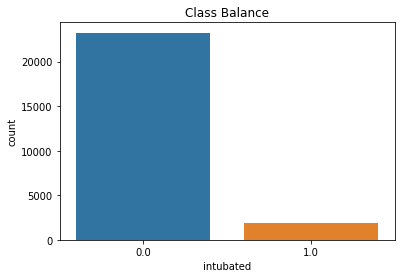

In [653]:
sns.countplot(y)
plt.title('Class Balance')
plt.show()

# Logistic Regressions

Class imbalance will pose a problem for predicting instances of the less frequent category e.g intubated

In [654]:
lr1 = LogisticRegression(solver='liblinear',penalty = 'l2', max_iter = 100000, C=.0045)
threshold = .45
lr1.fit(X_train, y_train)

y_test_predlr1 = lr1.predict(X_test)
y_train_predlr1 = lr1.predict(X_train)


y_train_probs = lr1.predict_proba(X_train)
y_test_probs = lr1.predict_proba(X_test)



y_pred_test_thresh = [1 if x[1] >= threshold else 0 for x in y_test_probs]
y_pred_train_thresh = [1 if x[1] >= threshold else 0 for x in y_train_probs]






In [655]:
# for x in range(len(y_test_probs)): 
#     print(y_test_probs[x], y_test_predlr1[x], y_pred_test_thresh[x])


In [656]:
report = classification_report(y_test, y_pred_test_thresh, target_names=['not '+ target, target])
print(report)

               precision    recall  f1-score   support

not intubated       0.93      1.00      0.96      4643
    intubated       0.00      0.00      0.00       375

     accuracy                           0.93      5018
    macro avg       0.46      0.50      0.48      5018
 weighted avg       0.86      0.93      0.89      5018



/Users/robholmstrom/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [657]:
from sklearn.metrics import confusion_matrix
print('LR1 confusion matrix')
print('Training\n', confusion_matrix(y_train, y_pred_train_thresh, normalize= None))
print('Test\n', confusion_matrix(y_test, y_pred_test_thresh, normalize = None))

LR1 confusion matrix
Training
 [[18592     1]
 [ 1477     1]]
Test
 [[4643    0]
 [ 375    0]]


In [658]:
coefs = pd.DataFrame(lr1.coef_[0], index=X_train.columns, columns=['Coef'])
coefs.loc['INTERCEPT'] = [lr1.intercept_[0]]
coefs

,Coef
age,-0.015584
sex,-0.918736
pneumonia,0.535416
diabetes,0.070636
copd,0.039502
asthma,-0.093821
immunosuppression,-0.032712
hypertension,0.069783
other_diseases,-0.100460
cardiovascular,0.059161


# Random Forests

In [659]:

rf1 = RandomForestClassifier(max_depth=8,  max_features=4,  n_estimators=500)
rf1.fit(X_train, y_train)

y_test_predrf1 = rf1.predict(X_test)
y_train_predrf1 = rf1.predict(X_train)
print(f'Test recall score is {recall_score(y_test, y_test_predrf1)}')
print(f'Train recall score is {recall_score(y_train, y_train_predrf1)}')


Test recall score is 0.18933333333333333
Train recall score is 0.2672530446549391


In [660]:
print('RF1 confusion matrix')
print('Training\n', confusion_matrix(y_train, y_train_predrf1, normalize= None))
print('Test\n', confusion_matrix(y_test, y_test_predrf1, normalize = None))

RF1 confusion matrix
Training
 [[18449   144]
 [ 1083   395]]
Test
 [[4594   49]
 [ 304   71]]


# K Nearest Neighbors

In [661]:

knn1 = KNeighborsClassifier(n_neighbors=2, weights='distance', algorithm='ball_tree', leaf_size=10)
knn1.fit(X_train, y_train)

y_test_predknn1 = knn1.predict(X_test)
y_train_predknn1 = knn1.predict(X_train)
print(f'Test recall score is {recall_score(y_test, y_test_predknn1)}')
print(f'Train recall score is {recall_score(y_train, y_train_predknn1)}')


Test recall score is 0.12
Train recall score is 0.6021650879566982


In [662]:

print(f'KNN1 cv scores are {cross_val_score(knn1, X, y, cv= 5)}')



KNN1 cv scores are [0.91869271 0.91849342 0.92148266 0.91630132 0.92027108]


In [663]:
print('knn1 confusion matrix')
print('Training\n', confusion_matrix(y_train, y_train_predknn1, normalize= None))
print('Test\n', confusion_matrix(y_test, y_test_predknn1, normalize = None))

knn1 confusion matrix
Training
 [[18545    48]
 [  588   890]]
Test
 [[4551   92]
 [ 330   45]]


# Support Vector Classification

In [664]:
c_values = [10**x for x in range(-2, 2)]
svmlin = SVC()
parameters = {'kernel':['linear'], 'C':c_values}
svmgrid = GridSearchCV(svmlin, parameters)
svmgrid.fit(X_train, y_train)

y_train_predsvmgrid = svmgrid.predict(X_train)
y_test_predsvmgrid = svmgrid.predict(X_test)

print(f'Test recall score is {recall_score(y_test, y_test_predsvmgrid)}')
print(f'Train recall score is {recall_score(y_train, y_train_predsvmgrid)}')
print(svmgrid.best_params_)


Test recall score is 0.0
Train recall score is 0.0
{'C': 0.01, 'kernel': 'linear'}


In [665]:

print('svmrbf confusion matrix')
print('Training\n', confusion_matrix(y_train, y_train_predsvmgrid, normalize= None))
print('Test\n', confusion_matrix(y_test,y_test_predsvmgrid, normalize = None))


svmrbf confusion matrix
Training
 [[18593     0]
 [ 1478     0]]
Test
 [[4643    0]
 [ 375    0]]


In [618]:
print(f'SVMlin cv scores are {cross_val_score(svmlin, X, y, cv= 5)}')

SVMlin cv scores are [0.54265403 0.54028436 0.54028436 0.53080569 0.5415677 ]
